<a href="https://colab.research.google.com/github/raga1106/Raga-Sindhura-Rangisetty/blob/main/Barrick_XYZ_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-f85496e780aa>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_positions, x='Open_Positions', y='Department', palette='Blues_r', ax=ax3)
<ipython-input-2-f85496e780aa>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_positions, x='Department', y='Time_to_Fill_Days', palette='Blues_r', ax=ax4)
<ipython-input-2-f85496e780aa>:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)


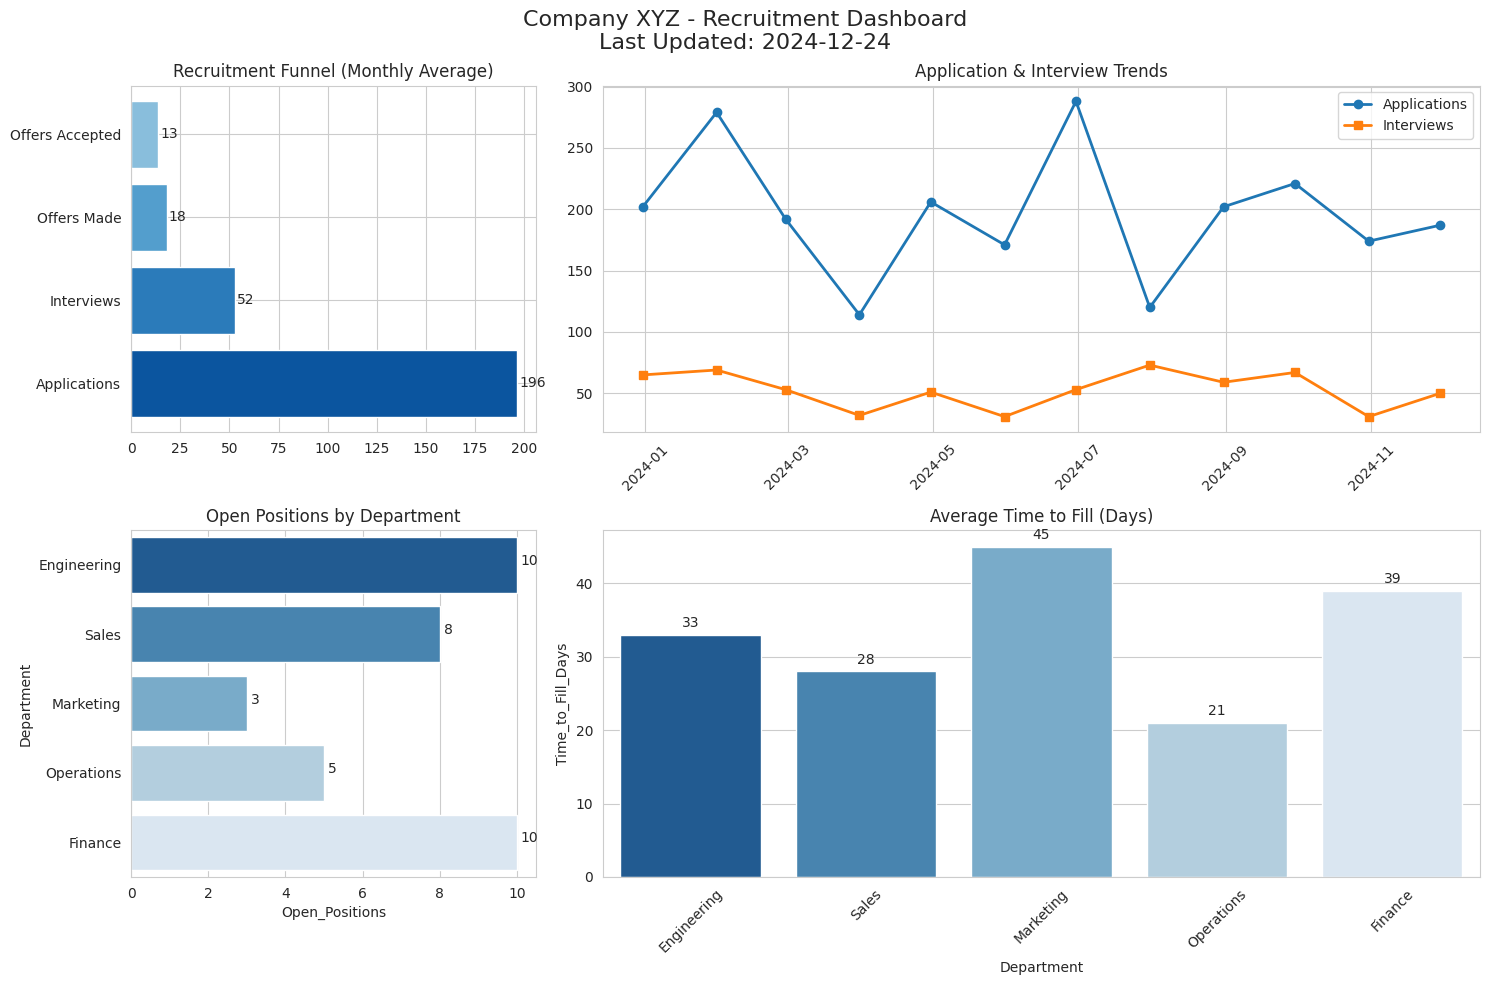

Key Metrics and Insights:
- Overall Conversion Rate (Applications to Hires): 7.0%
- Average Time to Fill Positions: 33.2 days
- Department with Most Open Positions: Engineering
- Department with Longest Time to Fill: Marketing


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Install Seaborn if not already installed
!pip install seaborn

# Set random seed for reproducibility
np.random.seed(42)

# Generate fictional recruitment data
dates = pd.date_range(end=datetime.now(), periods=12, freq='ME')
departments = ['Engineering', 'Sales', 'Marketing', 'Operations', 'Finance']

# Create recruitment metrics
applications = pd.DataFrame({
    'Date': dates,
    'Total_Applications': np.random.randint(100, 300, 12),
    'Interviews_Conducted': np.random.randint(30, 80, 12),
    'Offers_Made': np.random.randint(10, 25, 12),
    'Offers_Accepted': np.random.randint(8, 20, 12)
})

# Department-wise open positions
dept_positions = pd.DataFrame({
    'Department': departments,
    'Open_Positions': np.random.randint(2, 15, len(departments)),
    'Time_to_Fill_Days': np.random.randint(20, 60, len(departments))
})

# Set Seaborn style
sns.set_style('whitegrid')

# Create the dashboard
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Company XYZ - Recruitment Dashboard\nLast Updated: ' + datetime.now().strftime('%Y-%m-%d'), fontsize=16)

# 1. Recruitment Funnel
ax1 = plt.subplot2grid((2, 3), (0, 0))
funnel_data = [
    applications['Total_Applications'].mean(),
    applications['Interviews_Conducted'].mean(),
    applications['Offers_Made'].mean(),
    applications['Offers_Accepted'].mean()
]
funnel_labels = ['Applications', 'Interviews', 'Offers Made', 'Offers Accepted']
ax1.barh(funnel_labels, funnel_data, color=sns.color_palette('Blues_r'))
ax1.set_title('Recruitment Funnel (Monthly Average)')
for i, v in enumerate(funnel_data):
    ax1.text(v + 1, i, f'{int(v)}', va='center')

# 2. Time Series of Applications
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=2)
ax2.plot(applications['Date'], applications['Total_Applications'], marker='o', linewidth=2, label='Applications')
ax2.plot(applications['Date'], applications['Interviews_Conducted'], marker='s', linewidth=2, label='Interviews')
ax2.set_title('Application & Interview Trends')
ax2.legend()
plt.xticks(rotation=45)

# 3. Department-wise Open Positions
ax3 = plt.subplot2grid((2, 3), (1, 0))
sns.barplot(data=dept_positions, x='Open_Positions', y='Department', palette='Blues_r', ax=ax3)
ax3.set_title('Open Positions by Department')
for i, v in enumerate(dept_positions['Open_Positions']):
    ax3.text(v + 0.1, i, str(v))

# 4. Time to Fill by Department
ax4 = plt.subplot2grid((2, 3), (1, 1), colspan=2)
sns.barplot(data=dept_positions, x='Department', y='Time_to_Fill_Days', palette='Blues_r', ax=ax4)
ax4.set_title('Average Time to Fill (Days)')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45)
for i, v in enumerate(dept_positions['Time_to_Fill_Days']):
    ax4.text(i, v + 1, str(v), ha='center')

plt.tight_layout()
plt.show()

# Calculate key metrics for insights
conversion_rate = (applications['Offers_Accepted'].mean() / applications['Total_Applications'].mean()) * 100
avg_time_to_fill = dept_positions['Time_to_Fill_Days'].mean()
most_hiring_dept = dept_positions.loc[dept_positions['Open_Positions'].idxmax(), 'Department']
longest_fill_dept = dept_positions.loc[dept_positions['Time_to_Fill_Days'].idxmax(), 'Department']

print("\
Key Metrics and Insights:")
print("- Overall Conversion Rate (Applications to Hires): {:.1f}%".format(conversion_rate))
print("- Average Time to Fill Positions: {:.1f} days".format(avg_time_to_fill))
print("- Department with Most Open Positions:", most_hiring_dept)
print("- Department with Longest Time to Fill:", longest_fill_dept)